<a href="https://colab.research.google.com/github/TusharAMD/Machine-Learning/blob/master/Machine_Learning_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
##Importing Files

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1

---



In [55]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [56]:
#loading
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [57]:
#preview data
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [58]:
#getting rows and columns
print(data.shape)

(5000, 14)


In [59]:
print(data.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [60]:
#Columns
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [61]:
#Description of Data
print(data.describe())

                ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]


In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [63]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [64]:
#no null values found

# Step 2


In [65]:
(data['Experience'] < 0).sum()

52

In [66]:
data_new = data[data['Experience'] > 0]

In [67]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4882.0,2496.172061,1439.377900,1.0,1254.25,2490.5,3735.75,5000.0
Age,4882.0,45.826506,11.155088,25.0,36.00,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.00,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.00,64.0,98.00,224.0
ZIP Code,4882.0,93150.227366,2130.612121,9307.0,91910.25,93437.0,94608.00,96651.0
Family,4882.0,2.386112,1.148222,1.0,1.00,2.0,3.00,4.0
CCAvg,4882.0,1.935412,1.745065,0.0,0.70,1.5,2.60,10.0
Education,4882.0,1.874846,0.839329,1.0,1.00,2.0,3.00,3.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.00,0.0,101.75,635.0
Personal Loan,4882.0,0.096887,0.295833,0.0,0.00,0.0,0.00,1.0


# Step 3

---



**1) Number of unique in each column?**

In [68]:
for col in data_new.columns:
    print("The unique elements of %s are %2d" %(col,data_new[col].nunique()))

The unique elements of ID are 4882
The unique elements of Age are 43
The unique elements of Experience are 43
The unique elements of Income are 162
The unique elements of ZIP Code are 466
The unique elements of Family are  4
The unique elements of CCAvg are 108
The unique elements of Education are  3
The unique elements of Mortgage are 346
The unique elements of Personal Loan are  2
The unique elements of Securities Account are  2
The unique elements of CD Account are  2
The unique elements of Online are  2
The unique elements of CreditCard are  2


In [83]:
data_new.drop('ZIP Code',axis = 1)
data_new=data_new.drop('ZIP Code',axis = 1)

**2) Number of people with zero mortgage?**

In [70]:
#(data_new.Mortgage==0).sum()

In [71]:
print(data_new['Mortgage'][data_new['Mortgage']==0].count())

3371


**3) Number of people with zero credit card spending per month?**

In [72]:
print(data_new['CreditCard'][data_new['CreditCard']==0].count())

3442


**4) Value counts of all categorical columns.**

In [73]:
for col in data.columns:
    if data_new[col].nunique() >=2 and data_new[col].nunique()<=5:
        print(data_new[col].value_counts())
    

1    1460
2    1256
4    1179
3     987
Name: Family, dtype: int64
1    2063
3    1452
2    1367
Name: Education, dtype: int64
0    4409
1     473
Name: Personal Loan, dtype: int64
0    4374
1     508
Name: Securities Account, dtype: int64
0    4582
1     300
Name: CD Account, dtype: int64
1    2923
0    1959
Name: Online, dtype: int64
0    3442
1    1440
Name: CreditCard, dtype: int64


**5) Univariate and Bivariate analysis**

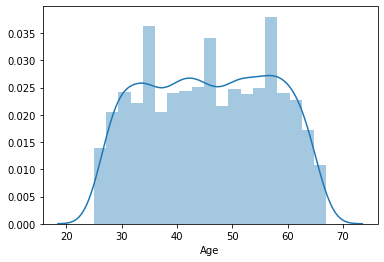

In [74]:
sns.distplot(data_new.Age)

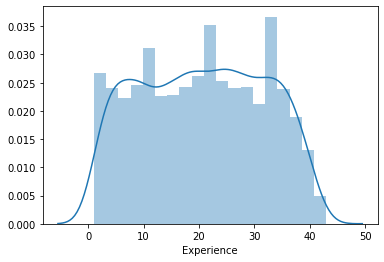

In [75]:
sns.distplot(data_new.Experience)

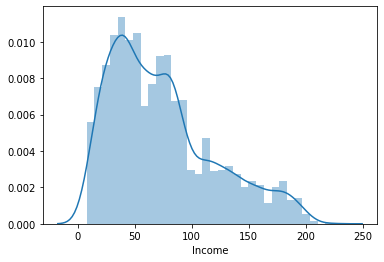

In [76]:
sns.distplot(data_new.Income)

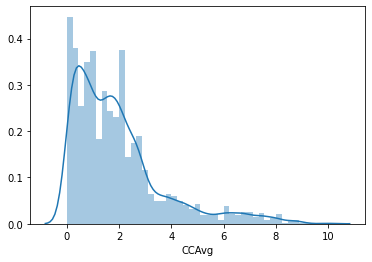

In [77]:
sns.distplot(data_new.CCAvg)

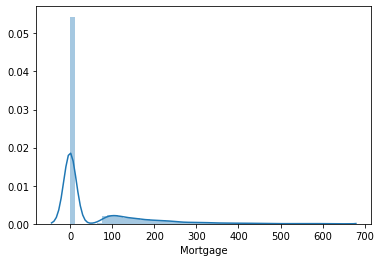

In [78]:
sns.distplot(data_new.Mortgage)

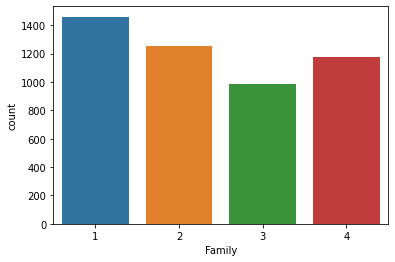

In [79]:
sns.countplot(data_new.Family)

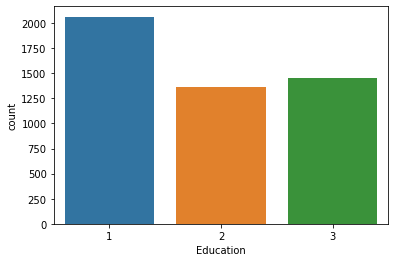

In [80]:
sns.countplot(data_new.Education)

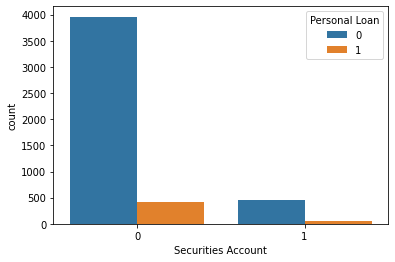

In [81]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=data_new)

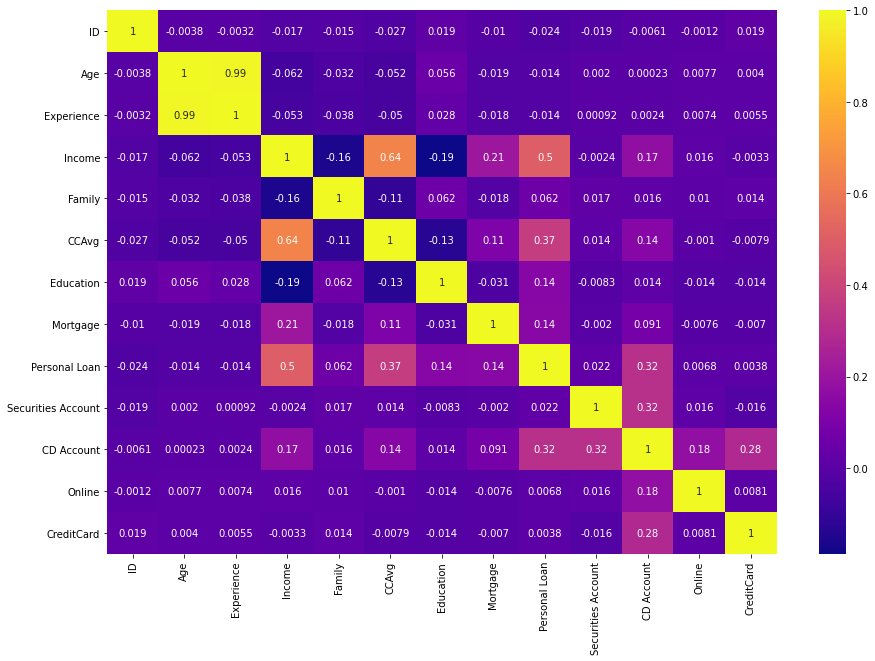

In [84]:
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(data_new.corr(),cmap="plasma",annot=True)

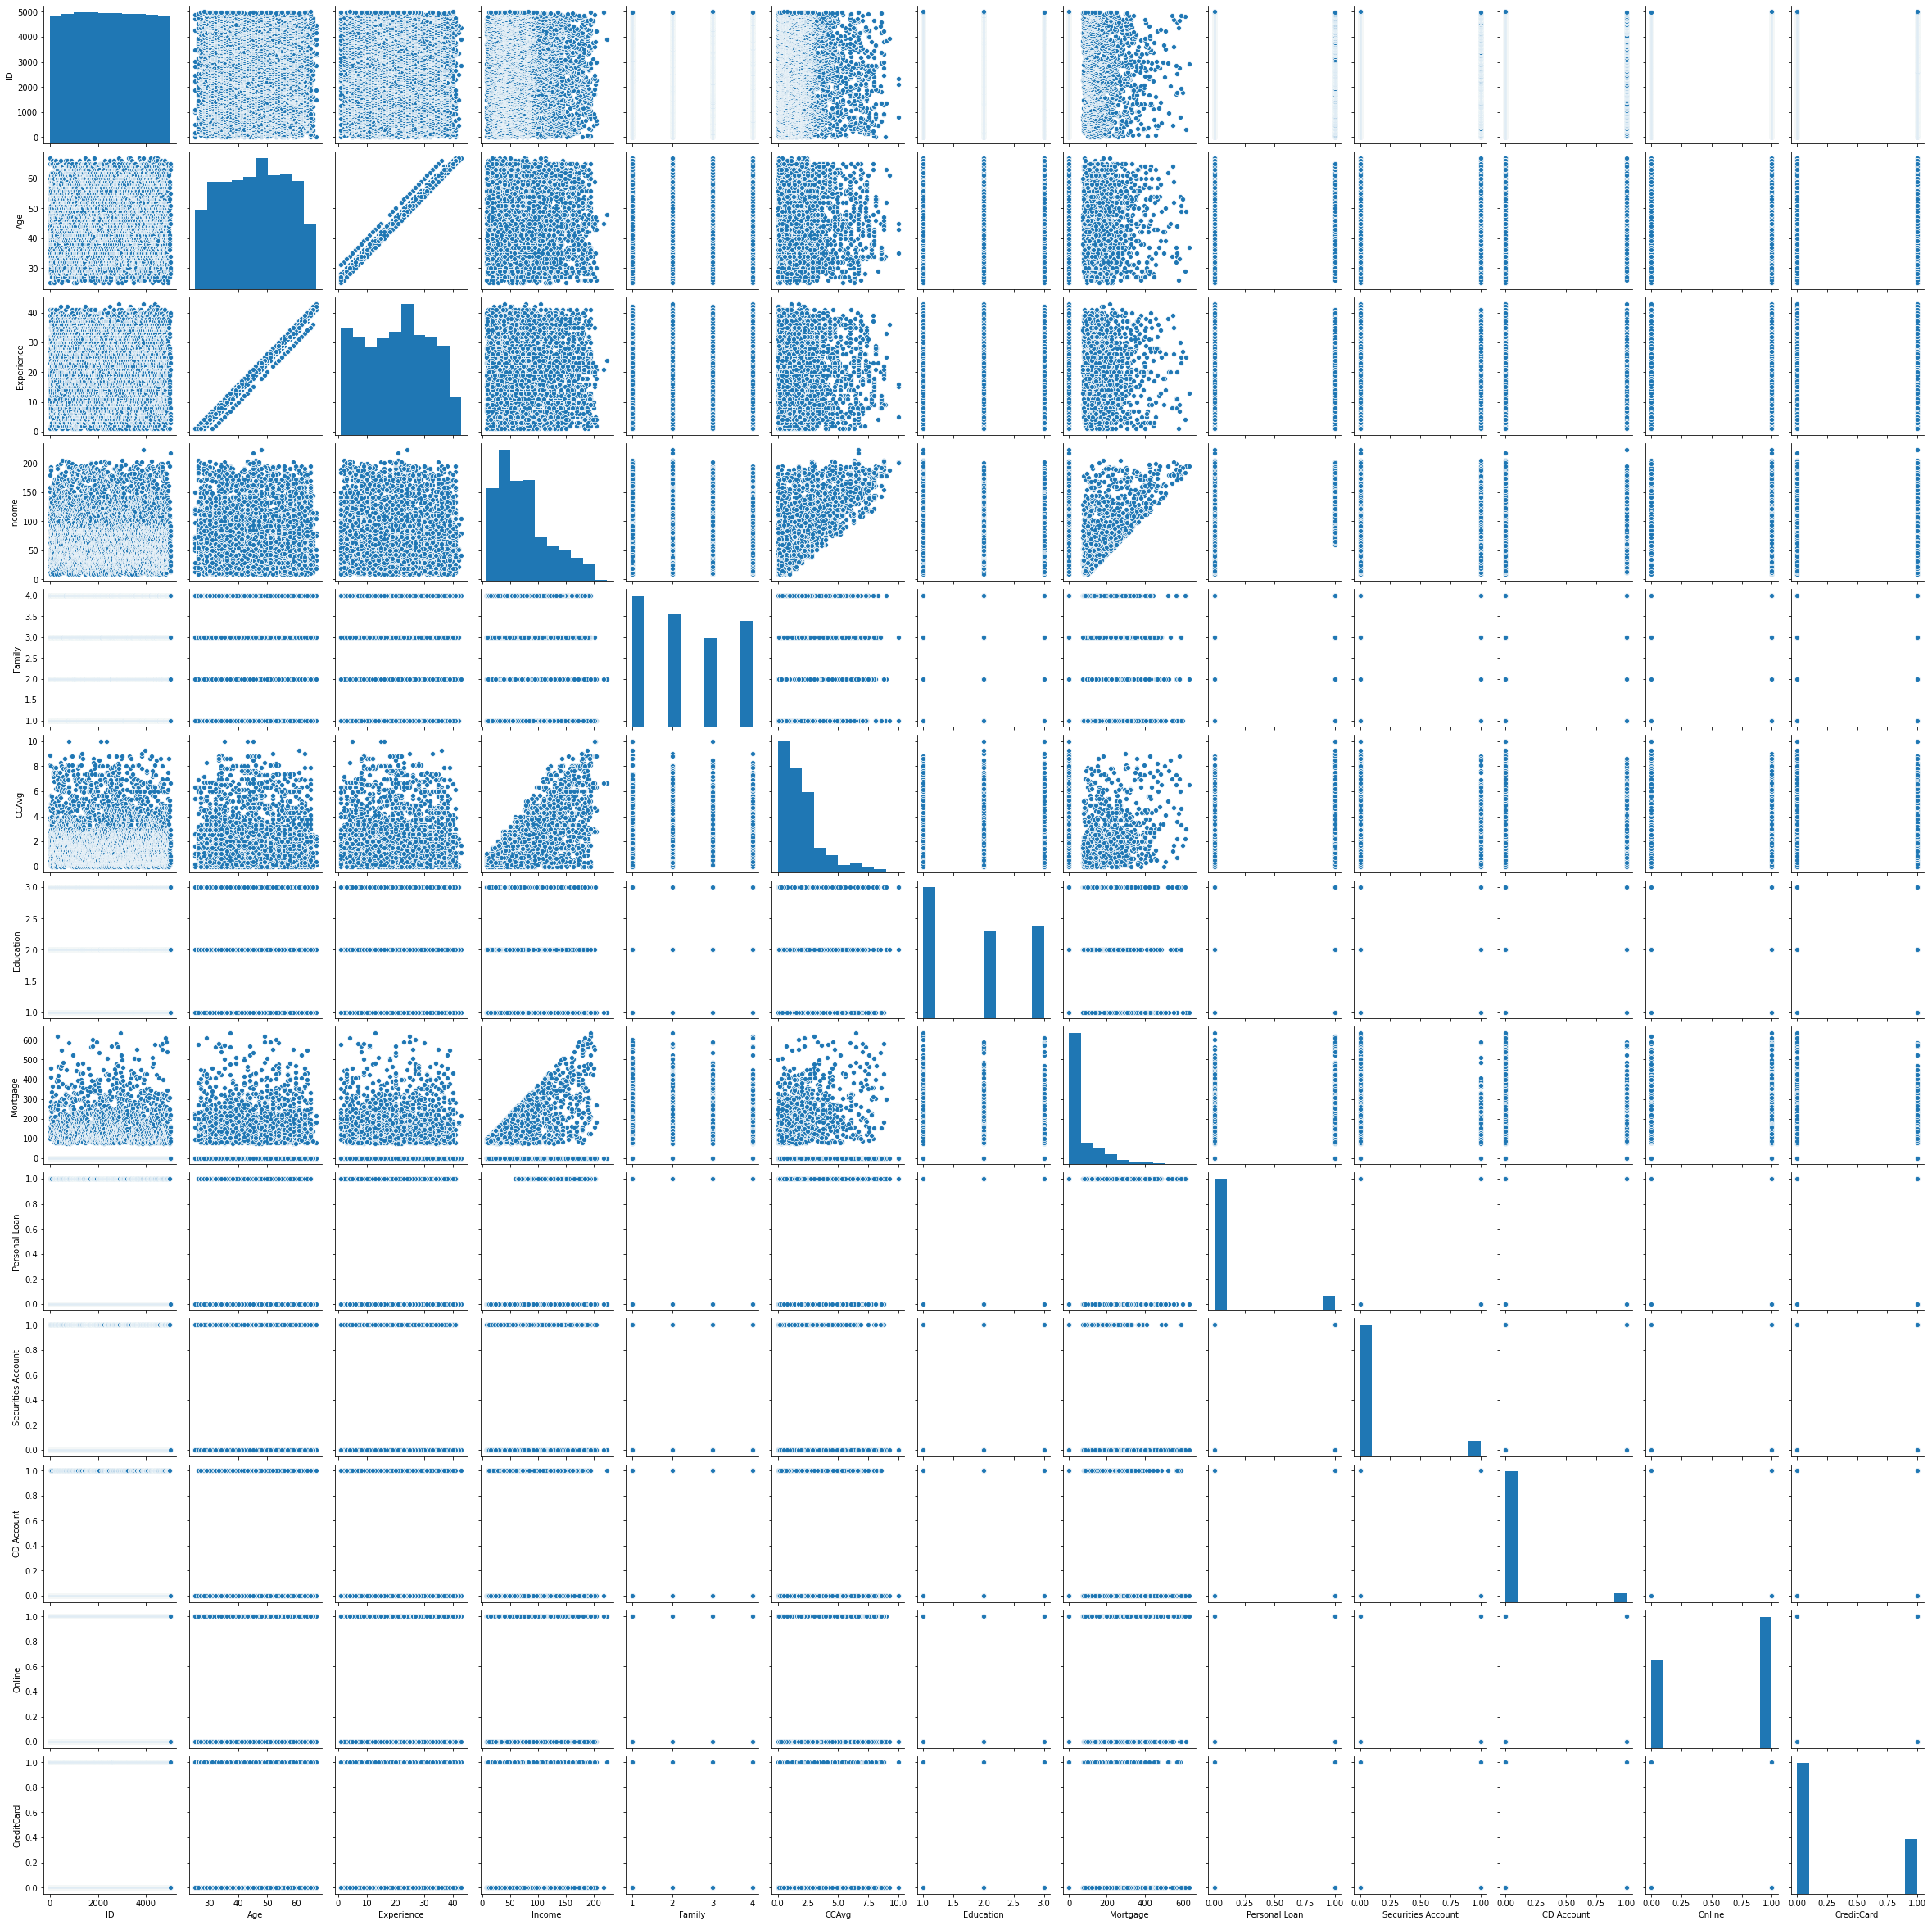

In [85]:
sns.pairplot(data_new)

#Training

In [87]:
X = data_new.loc[:, data_new.columns!= 'Personal Loan']
y = data_new.loc[:, data_new.columns == 'Personal Loan']

In [91]:
#Splitting X and y 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3417, 12), (1465, 12), (3417, 1), (1465, 1))

In [93]:
#fit the logistic regression

#import the library
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
#Prediction of the model

y_pred = logreg.predict(X_test)

In [95]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
#import the metric class

from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[1310,   19],
       [  56,   80]])

In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9488054607508533
Precision: 0.8080808080808081
Recall: 0.5882352941176471


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1329
           1       0.81      0.59      0.68       136

    accuracy                           0.95      1465
   macro avg       0.88      0.79      0.83      1465
weighted avg       0.94      0.95      0.95      1465



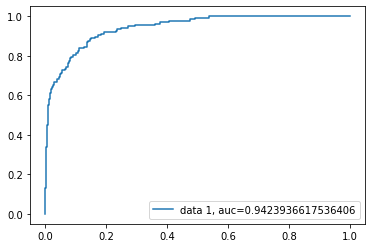

In [99]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()